In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import linear_model

palette = sns.color_palette("colorblind")
sns.set_palette(palette)
sns.set(context='paper', style='white')

In [89]:
data = pd.read_pickle("data/simulated_data.pkl")

In [90]:
print(data.to_string())

                                  pid   dP  trials  mean cues  mean correct  seed     T  w_ramp  w_time  w_delta
0    ece1f226b161426aafd433aa0e933b5d  0.4      26   7.480000      0.960000    14  0.44    0.10    0.09      0.2
1    ece1f226b161426aafd433aa0e933b5d  0.2      27   8.076923      0.769231    14  0.44    0.10    0.09      0.2
2    ece1f226b161426aafd433aa0e933b5d  0.1      26   8.280000      0.560000    14  0.44    0.10    0.09      0.2
3    58c54d6d2775404a9c3a3cde65c32a71  0.4      49   6.958333      0.979167    74  0.31    0.10    0.04      0.7
4    58c54d6d2775404a9c3a3cde65c32a71  0.2      49   7.958333      0.791667    74  0.31    0.10    0.04      0.7
5    58c54d6d2775404a9c3a3cde65c32a71  0.1      49   7.666667      0.666667    74  0.31    0.10    0.04      0.7
6    e00c31bc24424be5986b63504ef2572c  0.4      13  14.833333      0.916667   294  0.46    0.11    0.01      0.4
7    e00c31bc24424be5986b63504ef2572c  0.2      14  20.923077      0.846154   294  0.46    0.11 

In [94]:
# remove all data from the dataframe, except for the four parameters
accuracies = data.query('dP==0.1')['mean correct'].to_numpy()
cues = data.query('dP==0.1')['mean cues'].to_numpy()
cleaned_data = data.query('dP==0.1').drop(columns=['pid', 'dP', 'trials', 'seed', 'mean cues', 'mean correct'])

pca = PCA(n_components=4)
xs = pca.fit(cleaned_data).transform(cleaned_data)
print(f"explained variance ratio (first two components): {pca.explained_variance_ratio_}")

explained variance ratio (first two components): [0.90090612 0.06136629 0.02865925 0.00906834]


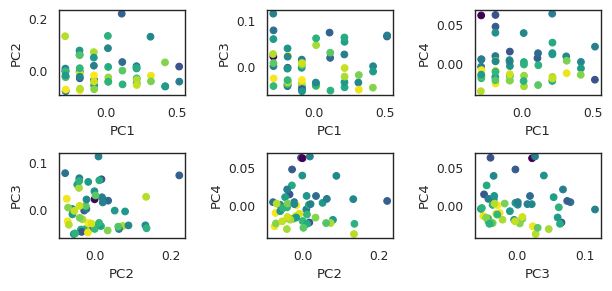

In [96]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=((6.38, 3)))
axes[0][0].scatter(xs[:,0], xs[:,1], c=accuracies, cmap="viridis")
axes[0][1].scatter(xs[:,0], xs[:,2], c=accuracies, cmap="viridis")
axes[0][2].scatter(xs[:,0], xs[:,3], c=accuracies, cmap="viridis", label='')
axes[1][0].scatter(xs[:,1], xs[:,2], c=accuracies, cmap="viridis")
axes[1][1].scatter(xs[:,1], xs[:,3], c=accuracies, cmap="viridis")
axes[1][2].scatter(xs[:,2], xs[:,3], c=accuracies, cmap="viridis")
# ax.legend()
axes[0][0].set(xlabel='PC1', ylabel='PC2')
axes[0][1].set(xlabel='PC1', ylabel='PC3')
axes[0][2].set(xlabel='PC1', ylabel='PC4')
axes[1][0].set(xlabel='PC2', ylabel='PC3')
axes[1][1].set(xlabel='PC2', ylabel='PC4')
axes[1][2].set(xlabel='PC3', ylabel='PC4')
# sm = plt.cm.ScalarMappable(cmap="viridis")
# sm.set_array([])
# plt.tight_layout()
# axes[0][2].legend()
# axes[0][2].get_legend().remove()
# axes[0][2].figure.colorbar(sm)
plt.tight_layout()
fig.savefig("plots/PCA_accuracy.svg")
fig.savefig("plots/PCA_accuracy.png", dpi=600)

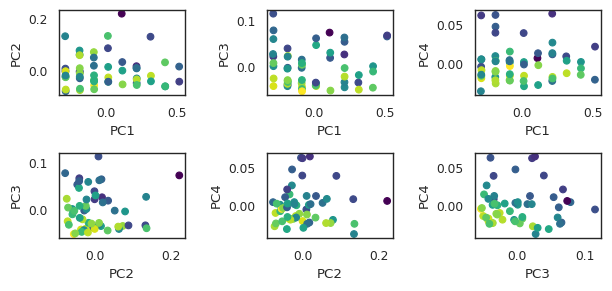

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=((6.38, 3)))
axes[0][0].scatter(xs[:,0], xs[:,1], c=cues, cmap="viridis")
axes[0][1].scatter(xs[:,0], xs[:,2], c=cues, cmap="viridis")
axes[0][2].scatter(xs[:,0], xs[:,3], c=cues, cmap="viridis", label='')
axes[1][0].scatter(xs[:,1], xs[:,2], c=cues, cmap="viridis")
axes[1][1].scatter(xs[:,1], xs[:,3], c=cues, cmap="viridis")
axes[1][2].scatter(xs[:,2], xs[:,3], c=cues, cmap="viridis")
# ax.legend()
axes[0][0].set(xlabel='PC1', ylabel='PC2')
axes[0][1].set(xlabel='PC1', ylabel='PC3')
axes[0][2].set(xlabel='PC1', ylabel='PC4')
axes[1][0].set(xlabel='PC2', ylabel='PC3')
axes[1][1].set(xlabel='PC2', ylabel='PC4')
axes[1][2].set(xlabel='PC3', ylabel='PC4')
# sm = plt.cm.ScalarMappable(cmap="viridis")
# sm.set_array([])
# plt.tight_layout()
# axes[0][2].legend()
# axes[0][2].get_legend().remove()
# axes[0][2].figure.colorbar(sm)
plt.tight_layout()
fig.savefig("plots/PCA_cues.svg")
fig.savefig("plots/PCA_cues.png", dpi=600)

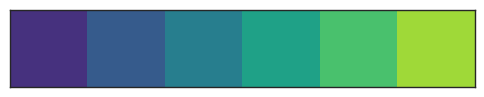

In [79]:
pal = sns.color_palette("viridis", as_cmap=True)
sns.palplot(pal)
plt.savefig('test.svg')

/tmp/ipykernel_1134856/4124748512.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


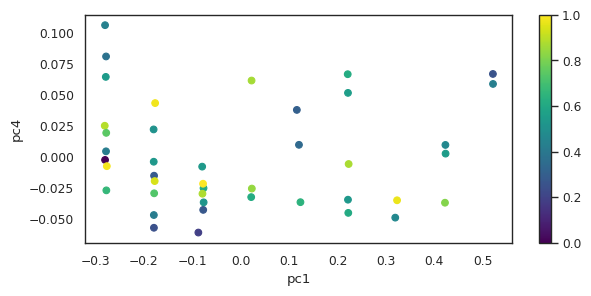

In [40]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,0], xs[:,3], c=accuracies, cmap="viridis", label="1")
ax.legend()
ax.set(xlabel='pc1', ylabel='pc4')
sm = plt.cm.ScalarMappable(cmap="viridis")
sm.set_array([])
plt.tight_layout()
ax.get_legend().remove()
ax.figure.colorbar(sm)
fig.savefig("plots/PCA.png", dpi=600)

/tmp/ipykernel_1134856/1827636926.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


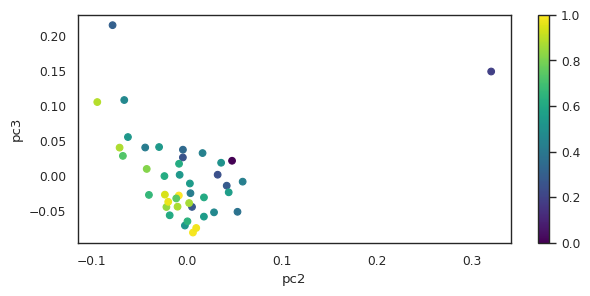

In [41]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,1], xs[:,2], c=accuracies, cmap="viridis", label="1")
ax.legend()
ax.set(xlabel='Principle Component 2', ylabel='Principle Component 3')
sm = plt.cm.ScalarMappable(cmap="viridis")
sm.set_array([])
plt.tight_layout()
ax.get_legend().remove()
ax.figure.colorbar(sm)
fig.savefig("plots/PCA.png", dpi=600)

/tmp/ipykernel_1134856/1905438684.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


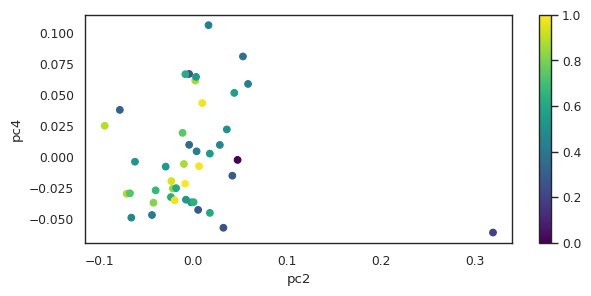

In [42]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,1], xs[:,3], c=accuracies, cmap="viridis", label="1")
ax.legend()
ax.set(xlabel='pc2', ylabel='pc4')
sm = plt.cm.ScalarMappable(cmap="viridis")
sm.set_array([])
plt.tight_layout()
ax.get_legend().remove()
ax.figure.colorbar(sm)
fig.savefig("plots/PCA.png", dpi=600)

/tmp/ipykernel_1134856/4003216034.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


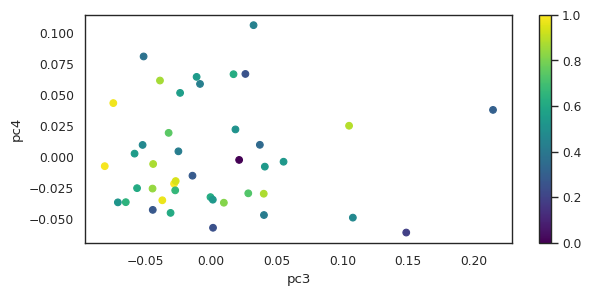

In [43]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,2], xs[:,3], c=accuracies, cmap="viridis", label="1")
ax.legend()
ax.set(xlabel='pc3', ylabel='pc4')
sm = plt.cm.ScalarMappable(cmap="viridis")
sm.set_array([])
plt.tight_layout()
ax.get_legend().remove()
ax.figure.colorbar(sm)
fig.savefig("plots/PCA.png", dpi=600)

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'accuracy')]

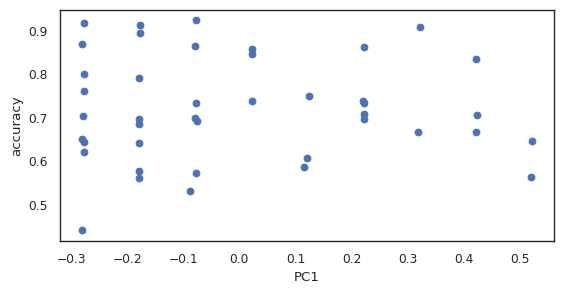

In [32]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,0], accuracies)
ax.set(xlabel='PC1', ylabel='accuracy')

[Text(0.5, 0, 'PC2'), Text(0, 0.5, 'accuracy')]

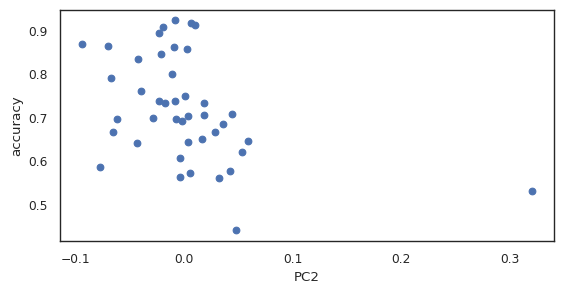

In [33]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,1], accuracies)
ax.set(xlabel='PC2', ylabel='accuracy')

[Text(0.5, 0, 'PC3'), Text(0, 0.5, 'accuracy')]

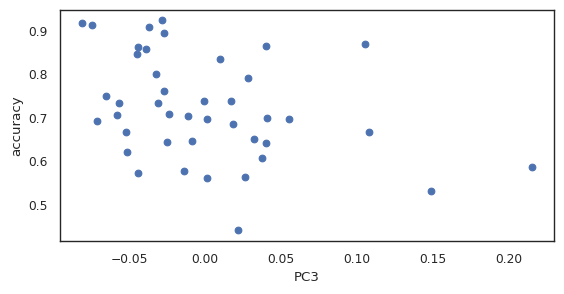

In [34]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,2], accuracies)
ax.set(xlabel='PC3', ylabel='accuracy')

[Text(0.5, 0, 'PC4'), Text(0, 0.5, 'accuracy')]

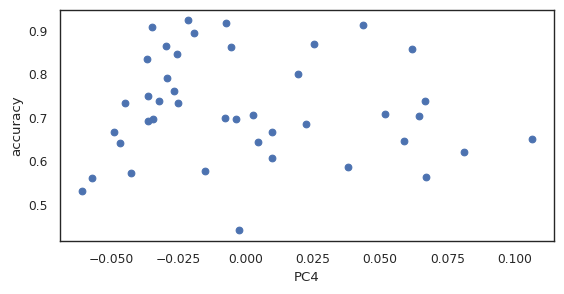

In [35]:
fig, ax = plt.subplots(figsize=((6.38, 3)))
ax.scatter(xs[:,3], accuracies)
ax.set(xlabel='PC4', ylabel='accuracy')

# Linear Regression

In [88]:
# remove all data from the dataframe, except for the four parameters
accuracies = data['mean correct'].to_numpy()
cues = data['mean cues'].to_numpy()
cleaned_data = data.drop(columns=['pid', 'dP', 'trials', 'seed', 'mean cues', 'mean correct'])

OLS =  linear_model.LinearRegression()
scaler = preprocessing.StandardScaler(with_mean=True, with_std=True)

X = scaler.fit(cleaned_data)
X2 = scaler.transform(cleaned_data)
Y = accuracies
coefficients = OLS.fit(X2,Y).coef_
r2 = OLS.score(X2, Y)
print(f"c_T={coefficients[0]}, c_ramp={coefficients[1]}, c_time={coefficients[2]}, c_delta={coefficients[3]}, R2={r2}")


X = scaler.fit(cleaned_data)
X2 = scaler.transform(cleaned_data)
Y = cues
coefficients = OLS.fit(X2,Y).coef_
r2 = OLS.score(X2, Y)
print(f"c_T={coefficients[0]}, c_ramp={coefficients[1]}, c_time={coefficients[2]}, c_delta={coefficients[3]}, R2={r2}")

c_T=0.017833557485062566, c_ramp=-0.014000487402111385, c_time=-0.04740245558317926, c_delta=-0.015366492233136006, R2=0.2247583190891953
c_T=1.539945044895007, c_ramp=-1.8815277951675853, c_time=-2.9495341364873253, c_delta=-1.0622920675504772, R2=0.795653481825785
